<a href="https://colab.research.google.com/github/Tanjul5/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/YES_BANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YES BANK STOCK CLOSING PRICE PREDICTION

**PROBLEM STATEMENT**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

In [1]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read csv file
bank_df= pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [4]:
#check data
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [5]:
bank_df.shape

(185, 5)

In [6]:
bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

only date column is an object type

no null values

dataset has 5 column and 185 rows

Close column is dependent varibale

In [7]:
#extract statistical information
bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


here is an outlier because of maximum value is much more high with respect to mean values.

**EDA AND DATAPREPROCESSING**

In [8]:
#check duplicate values
bank_df.duplicated().sum()

0

In [9]:
bank_df['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

dates are from july 2005 to november 2020

In [10]:
#preserve original file
df=bank_df.copy()

In [11]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df['Date'] = pd.to_datetime(bank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [12]:
#check date column
df['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

Now dates are in integer data types

**Check year distribution with respect to 'Close' variable**

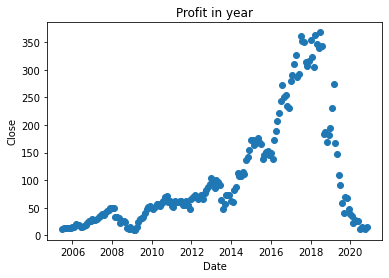

In [13]:
plt.scatter(df['Date'], df['Close'])
plt.title('Profit in year')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

As seen in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving Rana Kapoor.

**Create dependent and independent variable**

In [14]:
#create dependent and independent variable

#dependent variable 'close'
depen_var='Close'

#independent variable
indep_var='Open','High','Low'


** DATA VISULIZATION**

**UNIVARIATE ANALYSIS**

**Plote a graph of independent variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


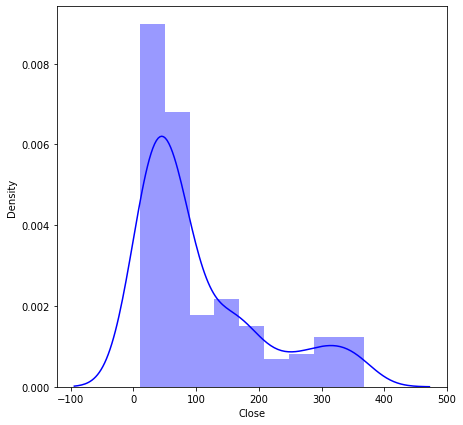

In [15]:
#dependent variable close
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="b")

***closing price graph is not showing normal distribution, it is right skewed means positive skewed so we apply log transformation.***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


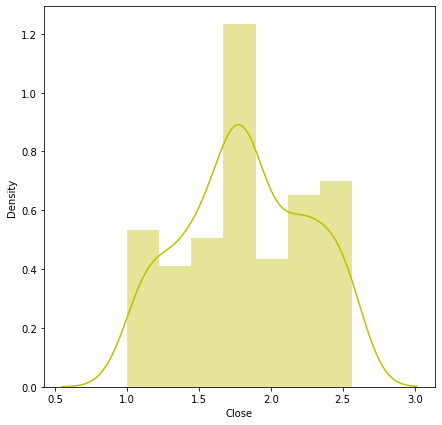

In [16]:
# Dependent variable 'Close'log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="y")

***Now it is normal ditributed***

**Now plote a graph of independent variable with or without log transformation**

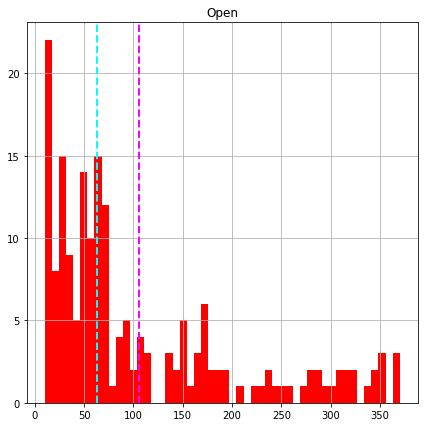

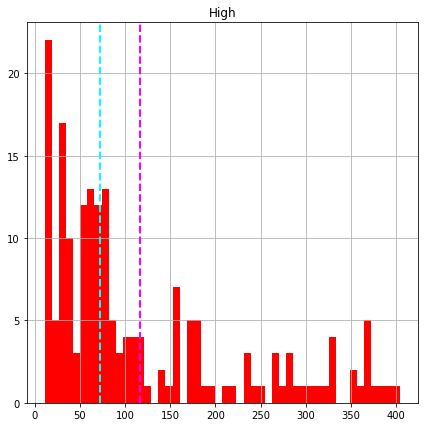

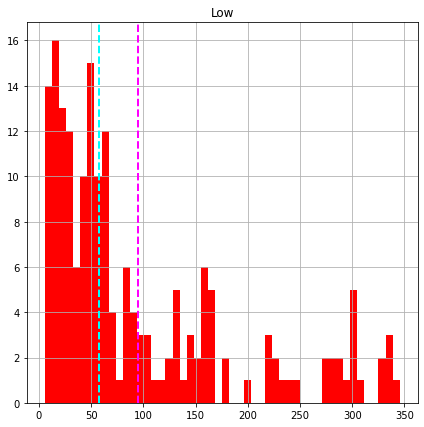

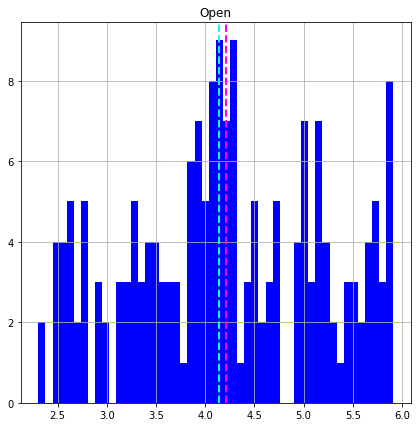

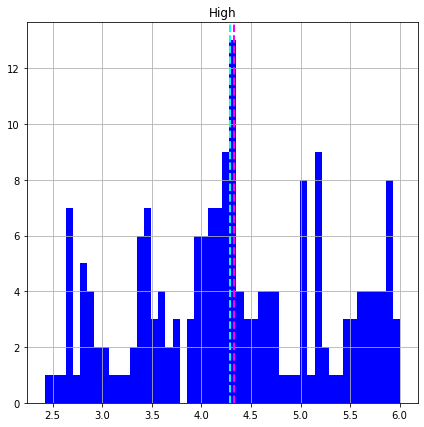

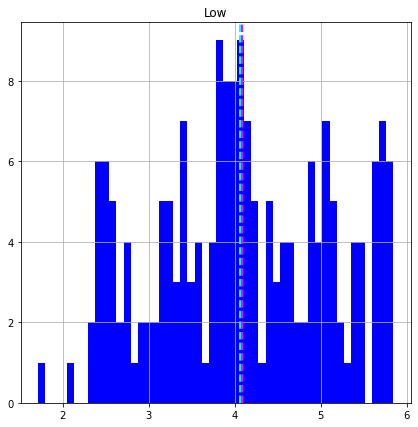

In [17]:
for col in indep_var:
  fig=plt.figure(figsize=(7,7))
  ax = fig.gca()
  features = df[col]
  label =df['Close']
  features.hist(bins = 50,ax = ax,color = 'red')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(col)

  #log transformation

for col in indep_var:
  fig=plt.figure(figsize=(7,7))
  ax = fig.gca()
  features = np.log(df[col])
  label = df['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(col)

***You can see three of them variable are positively skewed so we have done log transformer for normal distribution.***

Now lets check by the pairplote what are relation they have

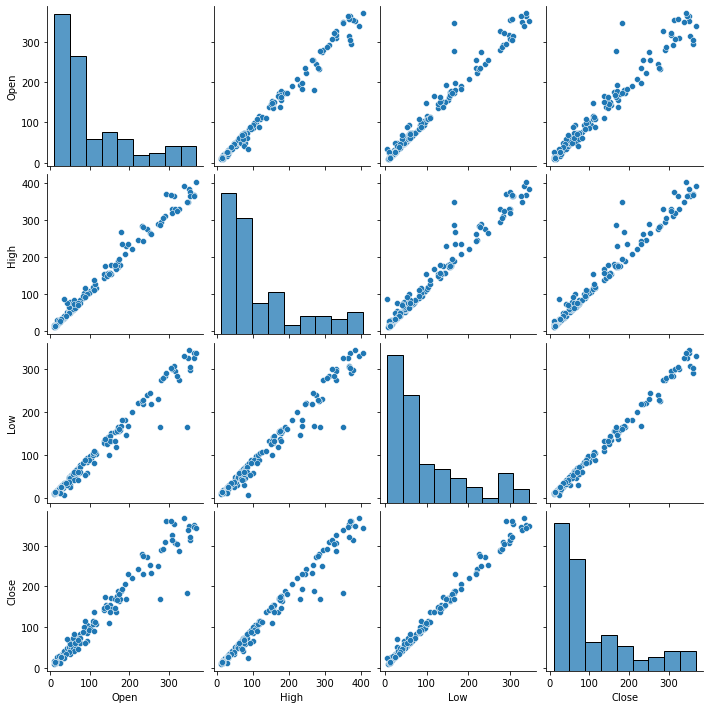

In [18]:
sns.pairplot(df)

all the variable are showing high correlation it showing linear realtionship.

**plot heatmap for correlation cofficient **

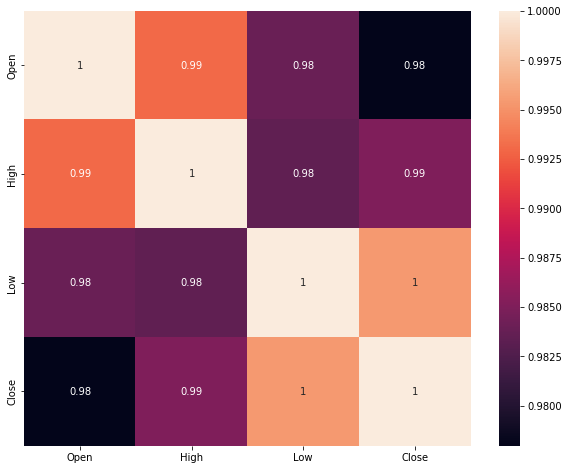

In [19]:
# plotting correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

•	All variables show the highest positive correlation among them which was above 0.98.

•	 ‘Open’ variable was highest correlated with ‘High’ variable which was 0.99/99%.

•	On the other hand, highest correlated coefficient was 1 between ‘Low’ and ‘Close’ variable.


In [20]:
#Assign x and y values 

x=df[['High','Low','Open']]
y=df ['Close']


In [21]:
x

,High,Low,Open
0,14.00,11.25,13.00
1,14.88,12.55,12.58
2,14.87,12.27,13.48
3,14.47,12.40,13.20
4,13.88,12.88,13.35
...,...,...,...
180,28.30,11.10,25.60
181,17.16,11.85,12.00
182,15.34,12.75,14.30
183,14.01,12.11,13.30


In [22]:
y

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

In [23]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 2)

In [24]:
#data transformation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
#reshape dataset


print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (148, 3)
x_test:  (37, 3)
y_train:  (148,)
y_test:  (37,)


# **LINEAR REGRESSION**

In [26]:
# Fitting Linear Regression to the Training set

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
#predictions
y_pred = lr.predict(x_test)

In [28]:
lr.coef_

array([ 204.29819612,  328.97029888, -165.72794055])

In [29]:
lr.intercept_

8.097399793883866

In [30]:
lr.score(x_train,y_train)

0.9940765402491637

In [31]:
#evaluation_metrics

#evaluation_metrics

from numpy import math
from sklearn.metrics import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE


MAE = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error:',MAE)
MSE = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

mean_absolute_error: 3.062009167268902
Mean Squared Error:  22.396814243070196
Root Mean Squared Error:  4.73252725750948
R2:  0.9980605678406007
Adjusted R2:  0.9978842558261098


**VISUALIZATION**

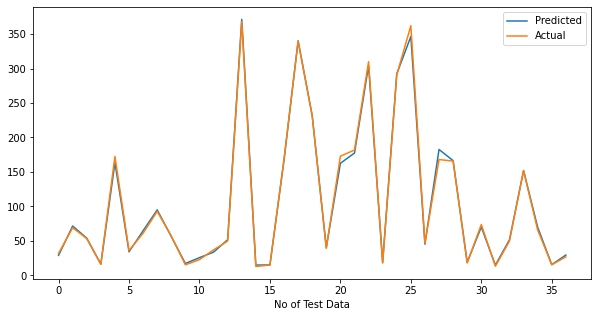

In [32]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Accuracy of linear regression is 99 % it means our model is overfiting then we will use lasso and ridge regression for reducing the overfitting.

# **LASSO REGRESSION**

In [33]:
#fitting data
lasso  = Lasso(alpha=1, max_iter= 1000)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [34]:
lasso.score(x_train, y_train)

0.9896840234340115

In [35]:
#prediction
y_pred_l = lasso.predict(x_test)

In [36]:
MAE = mean_absolute_error(y_test,y_pred_l)
print('mean_absolute_error:',MAE)
MSE = mean_squared_error(y_test,y_pred_l)
print("Mean Squared Error: ",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred_l)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_l))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

mean_absolute_error: 6.587522761482061
Mean Squared Error:  107.38188674595644
Root Mean Squared Error:  10.36252318433867
R2:  0.9907013612636217
Adjusted R2:  0.9898560304694055


In [37]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+03, tolerance: 9.517e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+03, tolerance: 8.804e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [38]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0014}
-56.12107129027785


In [39]:
lasso_regressor.score(x_train,y_train)

-54.450238374802595

In [40]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [41]:
MAE = mean_absolute_error(y_test,y_pred_lasso)
print('mean_absolute_error:',MAE)
MSE = mean_squared_error(y_test,y_pred_lasso)
print("Mean Squared Error: ",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred_lasso)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_lasso))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

mean_absolute_error: 3.0728275270479886
Mean Squared Error:  22.586504882230027
Root Mean Squared Error:  4.752526157974307
R2:  0.9980441417488392
Adjusted R2:  0.997866336453279


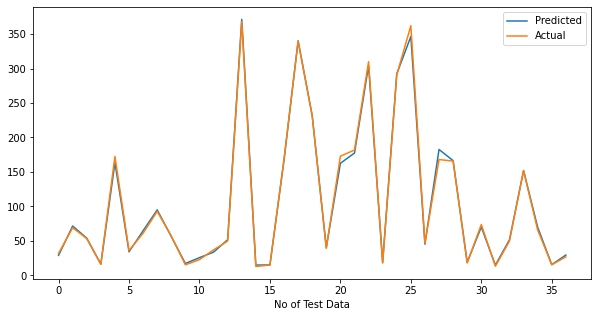

In [42]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**RIDGE REGRESSION**

In [43]:
reg = Ridge(alpha=0.001, max_iter=500)

In [44]:
#fitting data
reg.fit(x_train,y_train)

Ridge(alpha=0.001, max_iter=500)

In [45]:
reg.score(x_train, y_train)

0.9940756495972372

In [46]:
#Prediction
y_pred = reg.predict(x_test)

In [47]:
#evaluation_metrics
MAE = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error:',MAE)
MSE = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

mean_absolute_error: 3.078455164952672
Mean Squared Error:  22.947681145265644
Root Mean Squared Error:  4.790373800160656
R2:  0.9980128660123821
Adjusted R2:  0.9978322174680533


***Applying cross validation and Hyperparameter Tuning***

In [48]:
reg = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(reg,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [49]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-62.229446083894146


In [50]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [51]:
MAE = mean_absolute_error(y_test,y_pred_ridge)
print('mean_absolute_error:',MAE)
MSE = mean_squared_error(y_test,y_pred_ridge)
print("Mean Squared Error: ",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred_ridge)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_ridge))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

mean_absolute_error: 3.078455164952672
Mean Squared Error:  22.947681145265644
Root Mean Squared Error:  4.790373800160656
R2:  0.9980128660123821
Adjusted R2:  0.9978322174680533


**VISUALIZATION**

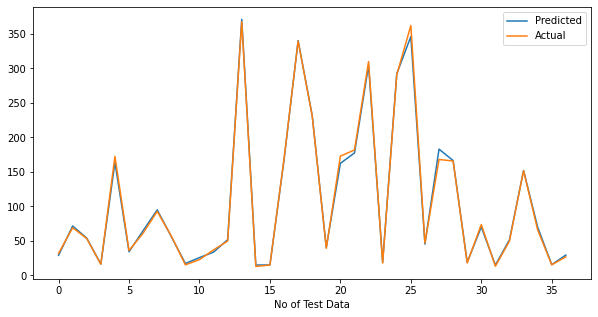

In [52]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **ElasticNet**

In [53]:
from sklearn.linear_model import ElasticNet 
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [54]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [55]:
elasticnet.score(x_train, y_train)

0.9444126805912082

In [56]:
elasticnet.coef_

array([ 95.56563156, 100.28319869,  93.60238722])

In [57]:
elasticnet.intercept_

28.212475815359554

In [58]:
y_pred_el= elasticnet.predict(x_test)

In [59]:
MAE = mean_absolute_error(y_test,y_pred_el)
print('mean_absolute_error:',MAE)
MSE = mean_squared_error(y_test,y_pred_el)
print("Mean Squared Error: ",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred_el)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_el))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

mean_absolute_error: 21.446553295005145
Mean Squared Error:  749.2750317682038
Root Mean Squared Error:  27.372888626672264
R2:  0.9351171967104288
Adjusted R2:  0.9292187600477405


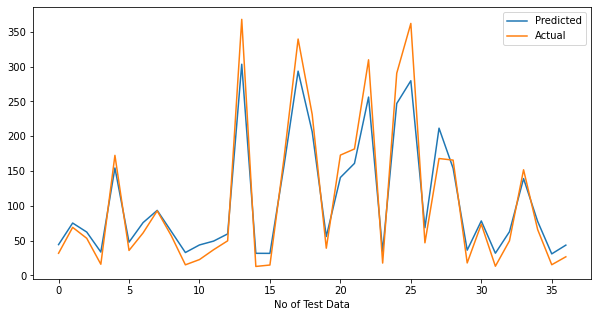

In [60]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_el)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Applying Cross Validation for ElasticNet Regression**

In [61]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+03, tolerance: 9.517e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+03, tolerance: 8.804e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [62]:
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.3}
-56.09450114757675


In [63]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [64]:
#evaluation_metrics
MAE = mean_absolute_error(y_test,y_pred_elastic)
print('mean_absolute_error:',MAE)
MSE = mean_squared_error(y_test,y_pred_elastic)
print("Mean Squared Error: ",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred_elastic)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_elastic))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

mean_absolute_error: 3.079068840827033
Mean Squared Error:  22.967846721145314
Root Mean Squared Error:  4.792478139871409
R2:  0.9980111197923193
Adjusted R2:  0.997830312500712


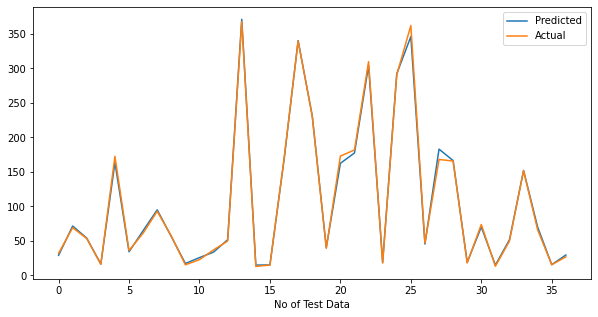

In [65]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **XGBOOST REGRESSOR**

In [66]:
from xgboost import XGBRegressor

In [67]:
#fitting data
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

[10:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [68]:
xgb.score(x_train,y_train)

0.999338792919384

In [69]:
#prediction
y_pred_x = xgb.predict(x_test)

In [70]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred_x))
print("MAE :" ,MAE)
MSE  = mean_squared_error((y_test), (y_pred_x))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred_x)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_x))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

MAE : 5.244598481461809
MSE : 76.91140094121097
Root Mean Squared Error:  8.769914534430251
R2:  0.9933399258130655
Adjusted R2:  0.9927344645233442


**VISULIZATION**

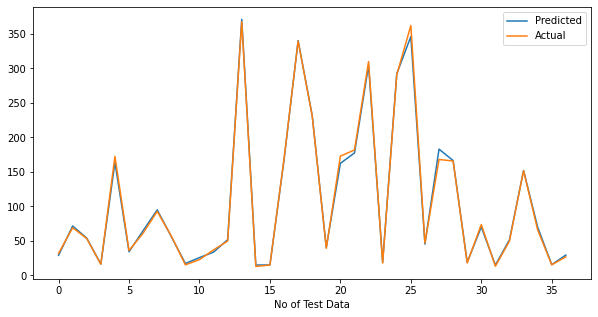

In [71]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **METRICS COMPARISION**

In [72]:
#Comparison between algorithms 
accuracy_list = ['MAE','MSE','RMSE','r_2',"Adjusted_R2"]
reg_models = [reg,lr,lasso,elasticnet,xgb]

def error_matrix(Y):
  MAE = mean_absolute_error(y_test,Y)
  MSE = mean_squared_error(y_test,Y)
  RMSE = np.sqrt(MSE)
  r_2 = r2_score(y_test,Y)
  adj_r2 = 1-(1-r2_score(y_test,Y))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))

  return MAE,MSE,RMSE,r_2,adj_r2

def training_accuracy(models):
  train_accuracy = []
  for model in reg_models:
    model.fit(x_train,y_train)
    train_accuracy.append(model.score(x_train,y_train))
  return train_accuracy



accuracy_df = pd.DataFrame(index = accuracy_list)
accuracy_df['Linear Regression'] = error_matrix(y_pred)
accuracy_df['Ridge'] = error_matrix(y_pred_ridge)
accuracy_df['Lasso'] = error_matrix(y_pred_lasso)
accuracy_df['ElasticNet'] = error_matrix(y_pred_elastic)
accuracy_df['XGBRegressor'] = error_matrix(y_pred_x)
accuracy_df.loc['Training Accuracy'] = training_accuracy(reg_models)
accuracy_df

[10:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Linear Regression,Ridge,Lasso,ElasticNet,XGBRegressor
MAE,3.078455,3.078455,3.072828,3.079069,5.244598
MSE,22.947681,22.947681,22.586505,22.967847,76.911401
RMSE,4.790374,4.790374,4.752526,4.792478,8.769915
r_2,0.998013,0.998013,0.998044,0.998011,0.993340
Adjusted_R2,0.997832,0.997832,0.997866,0.997830,0.992734
Training Accuracy,0.983205,0.994077,0.989684,0.944413,0.999339


# **CONCLUSION**

The target variable is highly dependent on input variables.

XGBRegression and Ridge Regression are performing better than other models with training accuracy 0.999494% and 0.994395respectively but it has overfitting.

best algorithm for our dataset is ElasticNet with 0.944 accuracy.

The accuracy for each model is more than 90%